In [73]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm as norm
import scipy as sp
import scipy.stats

In [84]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0*np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * sp.stats.t._ppf((1+confidence)/2., n-1)
    return m, m-h, m+h

def plot(ax,x,y,yu,yl):
    ax.plot(x,y,'b')
    ax.plot(x,yu,'r', alpha=0.3)
    ax.plot(x,yl,'r', alpha=0.3)
    ax.fill_between(x,y,yu, facecolor='red', alpha='0.2')
    ax.fill_between(x,yl,y, facecolor='red', alpha='0.2')
    ax.set_ylabel("Regret", fontsize=20)
    ax.set_xlabel("$t$", fontsize=20)

In [129]:
def prep_data(bias = True):
    a = np.random.normal(-2*np.ones(500), np.sqrt(0.5), [50000,500])
    b = np.random.normal(-10.0*np.ones(500), np.sqrt(0.25), [50000,500])
    
    if bias:
        d1 = np.c_[a, np.ones_like(a[:,0]), np.ones_like(a[:,0])]
        d2 = np.c_[b, np.ones_like(b[:,0]), -1*np.ones_like(b[:,0])]
    else:
        d1 = np.c_[a, np.ones_like(a[:,0])]
        d2 = np.c_[b, -1*np.ones_like(b[:,0])]
    d = np.append(d1,d2,0)

    np.random.shuffle(d)
    X = d[:,:-1]
    Y = d[:,-1]

    plus = np.where(Y==1)[0]
    minus = np.where(Y==-1)[0]
    return X, Y, plus, minus

In [130]:
def ogd(X, Y, eta=0.01):
    w = np.zeros_like(X[0,:])
    regret = np.zeros_like(X[:,0])
    #mistakes = 0
    i = 0
    for x,y in zip(X,Y):
        loss = max(0,1-y*np.sum(w*x))
        regret[i] = regret[i-1] + loss
        i+=1
        #if np.sign(np.sum(w*x)) != y:
        #    mistakes += 1
        if loss == 0:
            continue
        else:
            w = w + eta*y*x
    return w,regret

In [138]:
def omd(X, Y, eta=1e-1):
    w = np.ones_like(X[0,:])
    w = w/np.sum(w)
    regret = np.zeros_like(X[:,0])
    i = 0
    for x,y in zip(X,Y):
        loss = max(0,1-y*np.sum(w*x))
        regret[i] = regret[i-1] + loss
        i+=1
        if loss != 0:
            w = w*np.exp(eta*y*x)
            w = w/np.sum(w)
    return w,regret

In [139]:
R = []
for i in range(30):
    X, Y, plus, minus = prep_data()
    w, regret = ogd(X,Y)
    R.append(regret)

R = np.array(R)
mean_r = np.ones_like(R[0])
upper_r = np.ones_like(R[0])
lower_r = np.ones_like(R[0])
for i,regret in enumerate(R.T):
    mean_r[i], lower_r[i], upper_r[i] = mean_confidence_interval(regret)

r_ogd = R
m_ogd = mean_r
u_ogd = upper_r
l_ogd = lower_r

In [140]:
R = []
for i in range(3):
    X, Y, plus, minus = prep_data(False)
    w, regret = omd(X,Y)
    R.append(regret)

R = np.array(R)
mean_r = np.ones_like(R[0])
upper_r = np.ones_like(R[0])
lower_r = np.ones_like(R[0])
for i,regret in enumerate(R.T):
    mean_r[i], lower_r[i], upper_r[i] = mean_confidence_interval(regret)

r_omd = R
m_omd = mean_r
u_omd = upper_r
l_omd = lower_r

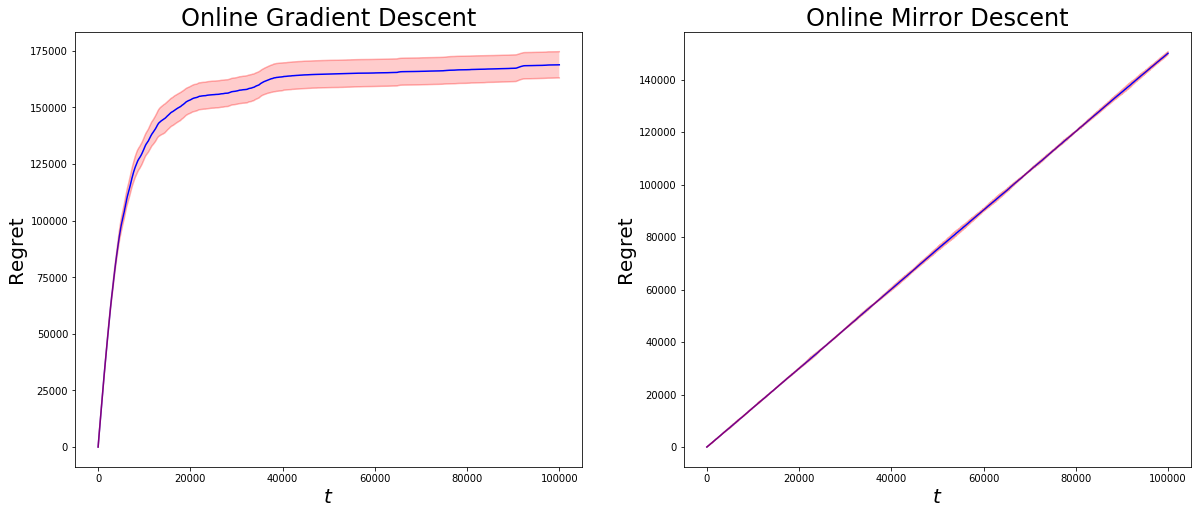

In [141]:
X = np.arange(mean_r.size)
fig, axs = plt.subplots(1,2, figsize = (20,8))
plot(axs[1],X,m_omd,u_omd,l_omd)
plot(axs[0],X,m_ogd,u_ogd,l_ogd)
axs[1].set_title("Online Mirror Descent", fontsize=24)
axs[0].set_title("Online Gradient Descent", fontsize=24)
plt.savefig("q7.png")
plt.show()